In [2]:
import pandas as pd
import numpy as np

In [3]:
from IPython.core.display import display, HTML # Расширить рабочее поле ноутбука на весь экран
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
from IPython.core.interactiveshell import InteractiveShell # Включить возможность вывести несколько output-ов в одной ячейке
InteractiveShell.ast_node_interactivity = "all"

Важная часть анализа больших данных - их эффективное обобщение: вычисление сводных показателей, например sum(), mean(), median(), min() и max(), в которых одно число позволяет понять природу, возможно, огромного набора данных.

## Данные о планетах

In [6]:
import  seaborn as sns

planets = sns.load_dataset('planets')
planets.shape

URLError: <urlopen error [Errno 111] Connection refused>

## Список агрегирующих методов библиотеки Pandas

| Агрегирующая функция      | Описание                           |
| ------------------------- | ---------------------------------- |
| count()                   | Общее количество элементов         |
| first(), last()           | Первый и последний элементы        |
| mean(), median()          | Среднее значение и медиана         |
| min(), max()              | Минимум и максимум                 |
| std(), var()              | Стандартное отклонение и дисперсия |
| mad()                     | Среднее абсолютное отклонение      |
| prod()                    | Произведение всех элеменов         |
| sum()                     | Сумма всех элементов               |

## GroupBy: разбиение, применение, объединение

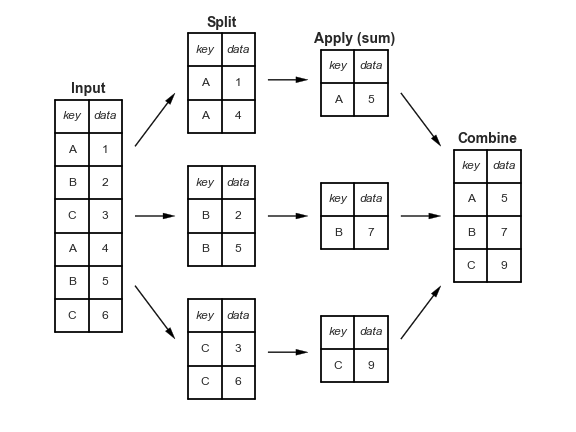

1. *Разбиение* включает разделение на чатси и группировку объекта DataFrame.
2. *Применение* включает вычисление какой-либо функции, обычно агрегирующей, преобразование или фильтрацию в пределах отдельных групп.
3. *Объединение* выполняется слияние результатов этих операций в выходной массив.

In [9]:
df = pd.DataFrame({
    'key': ['A', 'B', 'C', 'A' ,'B', 'C'],
    'data': range(6)}, 
    columns = ['key', 'data'])

gr = df.groupby('key')
gr # объект, готов к группировке, но пока не выполняет никаких вычислений

In [10]:
gr.sum()

,data
key,
A,3
B,5
C,7


### Индексация по столбцам

In [17]:
df = pd.DataFrame({
    'key': ['A', 'B', 'C', 'A' ,'B', 'C'],
    'dtype': ['T1', 'T1', 'T2', 'T2', 'T3', 'T3'],
    'data': range(6)})

df.groupby('dtype')['data'].sum()

dtype
T1    1
T2    5
T3    9
Name: data, dtype: int64

### Цикл по группам

In [19]:
for (dtype, group) in df.groupby('dtype'):
    print(f"{dtype} {group.shape}")

T1 (2, 3)
T2 (2, 3)
T3 (2, 3)


### Методы диспетчеризации

Все методы, не реализованные явным образом объектом GroupBy, будут передаваться далее и выполняться для групп, вне зависимости от того, являются ли они объектами Series или DataFrame. 

Например, можно использовать метод describe() объекта DataFrame для вычисления набора сводных показателей, описывающих каждую группу в данных 

In [24]:
df.groupby('dtype')['data'].describe()

,count,mean,std,min,25%,50%,75%,max
dtype,,,,,,,,
T1,2.0,0.5,0.707107,0.0,0.25,0.5,0.75,1.0
T2,2.0,2.5,0.707107,2.0,2.25,2.5,2.75,3.0
T3,2.0,4.5,0.707107,4.0,4.25,4.5,4.75,5.0
